# **복습**

# **1.환경준비**

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southampton, Cherbourg, Queenstown)

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


### 2) New York Air Quality

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date : 연,월,일

In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 2.데이터프레임 정보 조회하기

* 두 데이터프레임에 대해서 다음의 정보를 조회해 봅시다.

### (1) 상위 5개 행 조회

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


### (2) 행과 열의 수

In [9]:
titanic.shape

(891, 8)

### (3) 칼럼 정보

In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

### (4) 칼럼 이름만 리스트에 담아 조회

In [13]:
col_list = titanic.columns
col_list

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

### (5) 데이터프레임 각 열 들의 기초통계량 조회

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


### (6) 데이터프레임에 NaN이 존재하는지 확인

In [17]:
titanic.isna().sum() # Age에 177개 , Embarked 3개 존재 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

# 3.데이터프레임 조건 조회(.loc)

* 다음 질문에 맞는 조회를 수행하시오.

### (1) [titanic] 객실 등급(Pclass) 1등급, 나이(Age) 10살 이하 탑승객 조회

In [31]:
titanic.loc[(titanic['Pclass']==1) &(titanic['Age']<=10)   ,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,151.5500,Southampton
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,151.5500,Southampton
445,446,1,1,"Dodge, Master. Washington",male,4.00,81.8583,Southampton


### (2) [titanic] 객실 등급(Pclass)별 탑승객 수

In [65]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### (3) [titanic] 성별(Sex)이 남자인 탑승객과 여자인 탑승객의 나이를 각각 저장하시오.

In [67]:
male = titanic.loc[titanic['Sex']=='male','Age']
male

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

In [69]:
female = titanic.loc[titanic['Sex']=='female']['Age']
female

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64

### (4) [titanic] 나이(Age)에 NaN이 아닌 탑승객을 조회하시오.

In [73]:
titanic.loc[titanic['Age'].notna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,Queenstown
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,Cherbourg


### (5) [air quality] 오존 농도 10~20 사이의 데이터를 조회하시오.

In [61]:
air.loc[ (air['Ozone'] <=20)  & (10<=air['Ozone']) ]
#air.loc[ (air['Ozone'].between(10,20)]

,Ozone,Solar.R,Wind,Temp,Date
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
7,19,99.0,13.8,59,1973-05-08
9,20,194.0,8.6,69,1973-05-10
11,16,256.0,9.7,69,1973-05-12
12,11,290.0,9.2,66,1973-05-13
13,14,274.0,10.9,68,1973-05-14
14,18,65.0,13.2,58,1973-05-15
15,14,334.0,11.5,64,1973-05-16


### (6) [air quality] 날짜(Date) 1973-05-01, 1973-06-01, 1973-07-01 , 1973-08-01 을 조회하시오.

In [75]:
air.loc[air['Date'].isin(['1973-05-01', '1973-06-01', '1973-07-01' , '1973-08-01'])]

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
31,34,286.0,8.6,78,1973-06-01
61,135,269.0,4.1,84,1973-07-01
92,39,83.0,6.9,81,1973-08-01


# 4.데이터프레임 값 변경

### (1) [titanic] 승선지역(Embarked)을 변경하시오.(.map)
* Southampton --> S
* Cherbourg --> C
* Queenstown --> Q

In [82]:
titanic['Embarked']= titanic['Embarked'].map({'Southampton':'S',
                                             'Cherbourg' : 'C',
                                             'Queenstown': 'Q'})

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C


### (2) [titanic] 운임(Fare)을 다음과 같이 변경하시오.(pd.cut)
*  <= 30 ==> 'L'
*  <= 100 ==> 'M'
* 100 <   ==> 'H'

In [86]:
titanic['Fare'] = pd.cut(titanic['Fare'], bins =[-np.inf,30,100,np.inf], labels = ['L','M','H'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,L,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,M,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,L,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,M,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,L,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,L,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,L,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,L,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,L,C


### (3) [titanic] 성별(Sex)을 다음과 같이 변경하시오.(np.where)
* female ==> 0
* male ==> 1

In [88]:
# np.where (조건문 , 조건이 참일때 결과 , 조건이 거짓일 때 결과 )

titanic['Sex'] = np.where( titanic['Sex'] =='female',0,1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,L,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,M,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,L,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,M,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,L,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,L,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,L,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,L,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,L,C


# **5.그래프 그리기**

### (1) [air quality] 일자별 오존농도 그래프를 그려봅시다.
* 그래프 크기 : (8, 5)
* x축 : 날짜
* y축 : 오존농도
* title : Daily Ozone

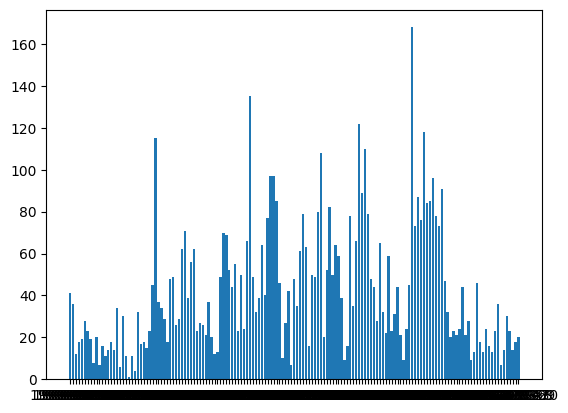

<Figure size 800x500 with 0 Axes>

In [99]:

plt.bar(x = air['Date'], height =air['Ozone'])
plt.figure( figsize = (8,5) )
plt.show()

### (2) [air quality] 일자별 오존농도, 온도 그래프를 하나의 틀에 합쳐서 그려봅시다.
* 그래프 크기 : (8, 5)
* x축 : 날짜
* y축 : 오존농도, 온도
* legend 추가

C:\Users\User\AppData\Local\Temp\ipykernel_16116\3086118668.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Ozone','Temp')


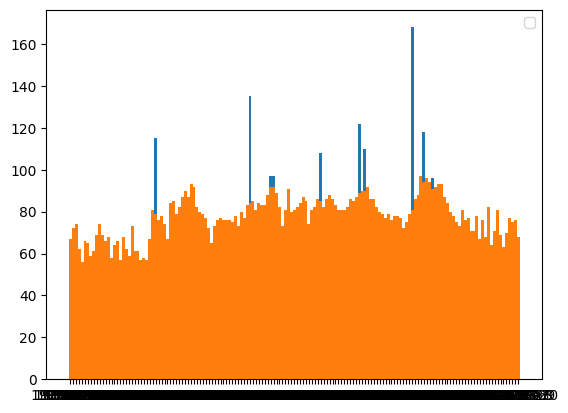

<Figure size 800x500 with 0 Axes>

In [109]:

plt.bar(x = air['Date'], height = air['Ozone'] ,width =1)
plt.bar(x = air['Date'], height = air['Temp'], width =1 )
plt.legend('Ozone','Temp')
plt.figure( figsize = (8,5) )
plt.show()

### (3) [air quality] 일자별 오존농도, 온도 그래프를 하나의 틀에 두개로 나눠서 그려봅시다.
* 그래프 크기 : (12, 5)
* x축 : 날짜
* y축 : 오존농도, 온도

C:\Users\User\AppData\Local\Temp\ipykernel_16116\454621528.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Ozone','Temp')


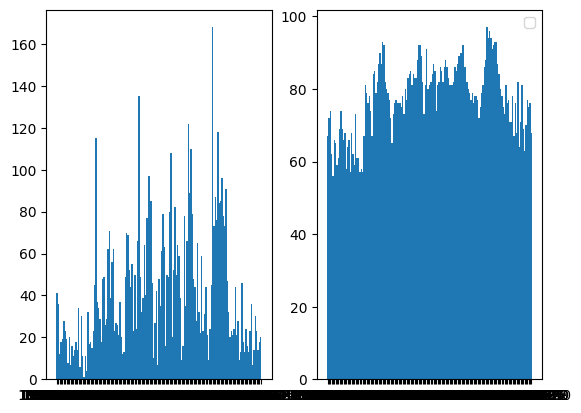

<Figure size 800x500 with 0 Axes>

In [111]:

plt.subplot(1,2,1)
plt.bar(x = air['Date'], height = air['Ozone'] ,width =1)
plt.subplot(1,2,2)
plt.bar(x = air['Date'], height = air['Temp'], width =1 )
plt.legend('Ozone','Temp')
plt.figure( figsize = (8,5) )
plt.show()